# Assignment 3: Logistic Regression


Apolline Chartier-Kastler, Guillaume Puy et Marème Kane SI groupe 2

Il reste à faire : question 3, 5.2, 6.2, 6.3, 7.2, 9 et 10

## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

![image.png](attachment:image.png)

1- Load data

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('loan_prediction.csv')
# shape of df
df.shape

(614, 13)

In [4]:
assert df.shape == (614, 13)

In [43]:
# head of df
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [3]:
#Remove Loan_ID
df.drop('Loan_ID', axis=1, inplace=True)
#Replace values in Loan_Status
df["Loan_Status"] = df["Loan_Status"].replace(['Y'], '1')
df["Loan_Status"] = df["Loan_Status"].replace(['N'], '0')
df["Loan_Status"] = pd.to_numeric(df["Loan_Status"])

In [4]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [37]:
type = df.dtypes
nb_null = df.isnull().sum()
data = {'Type': pd.Series(df.dtypes, index=df.columns), '# null': pd.Series(df.isnull().sum(), index=df.columns)}

In [39]:
#Pb pour ajouter #unique et unique values
nb_unique = df.Gender.unique()
print(nb_unique)

['Male' 'Female' nan]


In [38]:
stats = pd.DataFrame(data)
stats

,Column type,# null
Gender,object,13
Married,object,0
Dependents,object,15
Education,object,0
Self_Employed,object,32
ApplicantIncome,int64,0
CoapplicantIncome,float64,0
LoanAmount,float64,22
Loan_Amount_Term,float64,14
Credit_History,float64,50


4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [53]:
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
print(df.shape)

(614, 12)


In [62]:
#Removing rows containing Nan
df = df.dropna()

In [65]:
assert df.isnull().sum().sum() == 0

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

<AxesSubplot:title={'center':'Loan Status ? Yes=1 or No=0'}, xlabel='Loan_Status'>

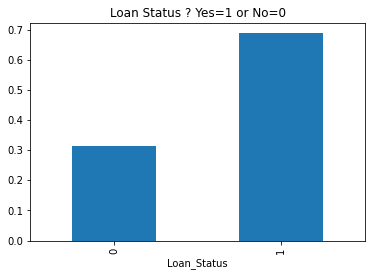

In [48]:
(df.groupby('Loan_Status').size()/df.shape[0]).plot(kind="bar",title="Loan Status ? Yes=1 or No=0")

5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [7]:
print ('approval rate =', df.Loan_Status.mean())

approval rate = 0.6872964169381107


In [8]:
#from sklearn.metrics import accuracy_score
#je galère
# deux idees : definir approval_rate et predicted_appr_rate=1 
#ou alors définir la colonne de loan status et une colonne de loan status=1

6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a barplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [44]:
def make_bar_plot(df, column):
    df1 = pd.DataFrame()
    df1['Total'] = df.groupby(column).size()
    df1['Loan_Status'] = df.groupby(column).sum()['Loan_Status']
    df1['Percentage'] = round(df1['Loan_Status']/df1['Total']*100,2)
    print(df1)
    
    df1['Loan_Status'].plot(kind="barh")
    df1['Total'].plot(kind="barh", alpha=0.5, title="Approval rate per " +str(column))
    plt.show()

               Total  Loan_Status  Percentage
Property_Area                                
Rural            179          110       61.45
Semiurban        233          179       76.82
Urban            202          133       65.84


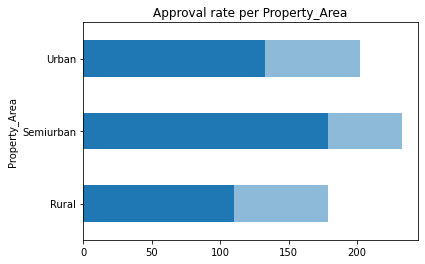

In [45]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [ ]:
def make_box_plot(df, column):  
    # your code here 

In [ ]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

In [ ]:
for col in # your code here:
    print(f'****************** {col} *******************')
    # your code here

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [74]:
df1 = pd.get_dummies(df['Property_Area'])
df2 = pd.get_dummies(df['Dependents'])
frames = [df, df1, df2]
df = pd.concat(frames, axis=1)

In [87]:
df = df.drop(['Property_Area', 'Dependents'], axis=1)

print the head of df

In [88]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban,0,1,2,3+
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [5]:
assert df.shape == (480, 17)

AssertionError: 

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

Gender : Male = 1, Female = 0 | Married : Yes = 1, No = 0 | Education : Graduate = 1, Not Graduate = 0 | Self_Employed : Yes = 1, No = 0

In [ ]:
#cf. question 2. comprend pas comment faire avec categorical

Print the head of df

In [ ]:
df.head()

In [ ]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [93]:
y = df.Loan_Status
X = df.drop('Loan_Status', axis=1, inplace=False)
print (X.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Rural', 'Semiurban', 'Urban', '0', '1', '2', '3+'],
      dtype='object')


8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [95]:
# your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (336, 16) (336,)
test shape (144, 16) (144,)


8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [96]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

ValueError: could not convert string to float: 'Female'

9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [ ]:
from sklearn import metrics
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

In [ ]:
precision_0 = # your code here
recall_1 = # your code here
print ('precision_0 =', # your code here)
print ('recall_1 =',# your code here)

10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [ ]:
# evaluate the model using 5-fold cross-validation
# your code here
scores = # your code here
print (scores)
print ('scores mean =', '# your code here', 'scores std =', '# your code here')

how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of f1 score.